### imports

In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import helper_functions as hf

### importing and processing the data

In [2]:
#creating a dataframe from the data
df = pd.read_hdf('../data/aggregated_song_features.h5', key='data')

print('size of the dataframe before pruning:', df.shape)

size of the dataframe before pruning: (10000, 4)


#### Danceability by decade

size of the dataframe with years: (4667, 2)
        mean  count
decade             
1920    0.63      6
1930    0.48      6
1940    0.52      4
1950    0.58     30
1960    0.65    137
1970    0.60    246
1980    0.64    437
1990    0.62   1201
2000    0.63   2536
2010    0.66     64


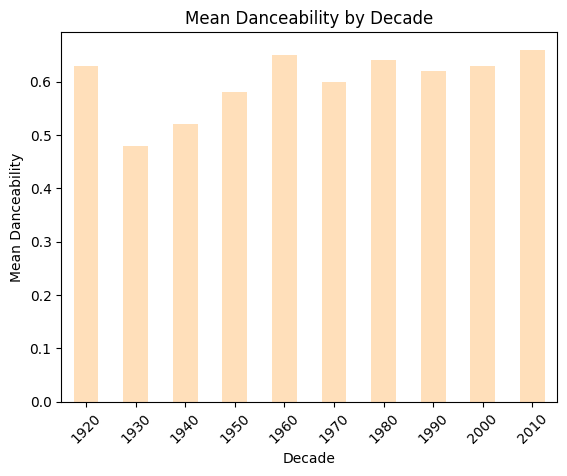

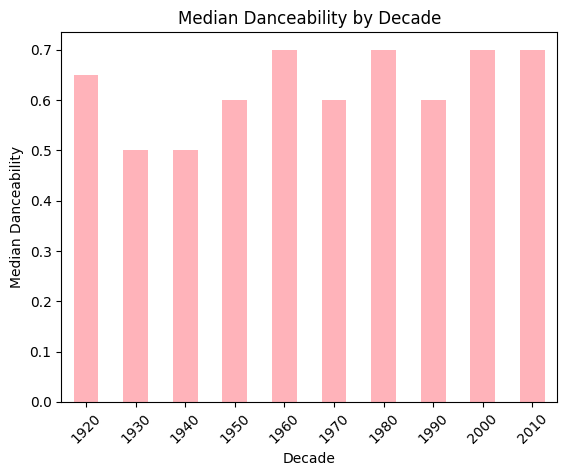

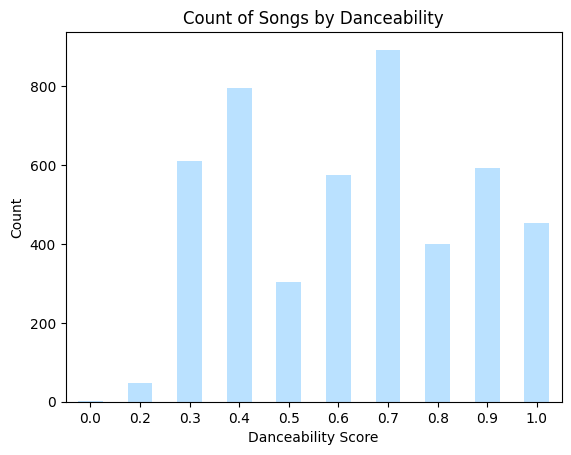

In [3]:

# Preprocess the data
new_df_year = hf.preprocess_data(df, True)
print('size of the dataframe with years:', new_df_year.shape)

#grouping the data by decade and calculating the mean danceability and the count of songs in each decade
grouped_decade = new_df_year.groupby('decade')['danceability'].agg(['mean', 'count']).round(2)
print(grouped_decade)

grouped_decade.to_csv('../data/mean_danceability_by_decade.csv')

#plotting this data
grouped_decade['mean'].plot(kind='bar', color='#ffdfba')
plt.xticks(rotation=45)
plt.ylabel('Mean Danceability')
plt.xlabel('Decade')
plt.title('Mean Danceability by Decade')
plt.savefig('../images/mean_danceability_by_decade.png', bbox_inches='tight')
plt.show()

#group by decade and median danceability
grouped_decade_median = new_df_year.groupby('decade')['danceability'].median().round(2)

#plotting this data
grouped_decade_median.plot(kind='bar', color='#ffb3ba')
plt.xticks(rotation=45)
plt.ylabel('Median Danceability')
plt.xlabel('Decade')
plt.title('Median Danceability by Decade')
plt.savefig('../images/median_danceability_by_decade.png', bbox_inches='tight')
plt.show()

# counting the number of songs with a specific danceability score
danceability_score_count = new_df_year['danceability'].round(2).value_counts().sort_index()

#plotting this data
danceability_score_count.plot(kind='bar', color='#bae1ff')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('Danceability Score')
plt.title('Count of Songs by Danceability')
plt.savefig('../images/count_of_songs_by_danceability.png', bbox_inches='tight')
plt.show()


#### Danceability by words in title and decade

In [4]:
# Preprocess the data with titles (year argument False)
new_df_title = hf.preprocess_data(df, False)
print('size of the dataframe with titles:', new_df_title.shape)

#get the word count for each song title
word_count = hf.danceability_by_word(new_df_title)

#store the word count by decade
word_store_by_decade = hf.get_word_count_store_by_decade(word_count)

#get the count of words by decade and the count of songs by word
df_count_by_decade, df_count_by_word = hf.get_word_count_ind_and_by_decade(word_store_by_decade)

#sort the dataframes and print to verify head
df_count_by_word.sort_values(by='danceability', ascending=False, inplace=True)
df_count_by_decade.sort_values(by='decade', ascending=False, inplace=True)

print(df_count_by_word.head(10))
print(df_count_by_decade.head(10))

#make the top 10 words by decade into a dataframe and print
df_mean_dance_by_decade = hf.get_top_10_words_by_decade(df_count_by_decade)

print(df_mean_dance_by_decade)

#store the top 10 words by decade, and top 20 words csv files
df_mean_dance_by_decade.to_csv('../data/mean_danceability_by_word.csv', index=False)
df_count_by_word.head(20).to_csv('../data/count_by_word.csv', index=False)



size of the dataframe with titles: (4667, 3)
      word  danceability  count
89     que          0.78     12
3      its          0.75     28
86    want          0.75     19
67     say          0.74     19
83    town          0.74     11
102    had          0.73     11
93    dont          0.73     66
110    bad          0.73     13
117  youre          0.72     11
129   lost          0.72     11
          word  danceability  decade  count
6090  sabotage           0.4    2010      1
6130       ate           0.6    2010      1
6128       won           0.6    2010      1
6127      legs           1.0    2010      1
6126     gimme           1.0    2010      1
6125      down           0.8    2010      1
6124     shake           0.8    2010      1
6123      city           0.8    2010      1
6122     blues           0.8    2010      1
6121       gay           0.8    2010      1
                 1920           1930           1940              1950  \
0  (mississippi, 0.9)    (moon, 0.7)   (fixin,